# Load Necessaries

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Regressor

In [3]:
from utils.preprocessing_withval import Makeloader, create_loaders, create_raw_loaders, create_loaders_cls
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



In [4]:
import pandas as pd
T1 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T1_prediction_type3.csv")
T4 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T4_prediction_type3.csv")
T5 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T5_prediction_type3.csv")
T8 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T8_prediction_type3.csv")

In [5]:
train_classified_output = pd.concat([T1, T4], axis=0).reset_index(drop=True)

print(train_classified_output)

      true_label  pred_prob
0              0   0.000021
1              0   0.000198
2              0   0.000019
3              0   0.000008
4              0   0.000311
...          ...        ...
8875           1   1.000000
8876           1   1.000000
8877           1   1.000000
8878           1   1.000000
8879           1   1.000000

[8880 rows x 2 columns]


In [13]:
import utils 
train_loader, val_loader = create_loaders_cls(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/splitted_100ms/T4",
    ],
    modalities=['Acc','Force'],
    batch_size=32,
    aux_df_or_series=train_classified_output,
    train_val_ratio=0.9,
)




xb, yb = next(iter(train_loader))
seq_len  = xb.shape[1]   # 84(12*7)
input_sz = xb.shape[-1]  # 보통 84 (Acc3+Force3+Acoustic1)
print(seq_len, input_sz)


73 73


In [7]:
test_classified_output = pd.concat([T5, T8], axis=0).reset_index(drop=True)

print(test_classified_output)

      true_label  pred_prob
0              0   0.000021
1              0   0.000198
2              0   0.000019
3              0   0.000008
4              0   0.000311
...          ...        ...
8875           1   1.000000
8876           1   1.000000
8877           1   1.000000
8878           1   1.000000
8879           1   1.000000

[8880 rows x 2 columns]


In [8]:
from model.regressor import *
from utils.train import train_model
from utils.test import evaluate_model
import numpy as np

In [9]:
# hyperparameter settings
input_size = input_sz  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500

Epoch 1/200 | Train Loss: 41793.6951 | Val Loss: 32728.0751
Epoch 2/200 | Train Loss: 28550.3784 | Val Loss: 22995.8105
Epoch 3/200 | Train Loss: 20183.8385 | Val Loss: 16185.8772
Epoch 4/200 | Train Loss: 14262.2169 | Val Loss: 11414.3148
Epoch 5/200 | Train Loss: 10140.3273 | Val Loss: 8180.0541
Epoch 6/200 | Train Loss: 7378.4282 | Val Loss: 6093.1415
Epoch 7/200 | Train Loss: 5621.5143 | Val Loss: 4833.4537
Epoch 8/200 | Train Loss: 4575.2945 | Val Loss: 4135.2134
Epoch 9/200 | Train Loss: 3999.2376 | Val Loss: 3788.2117
Epoch 10/200 | Train Loss: 3711.1412 | Val Loss: 3640.2638
Epoch 11/200 | Train Loss: 3563.8072 | Val Loss: 3510.2908
Epoch 12/200 | Train Loss: 2291.3257 | Val Loss: 1666.8254
Epoch 13/200 | Train Loss: 1397.6297 | Val Loss: 1193.9920
Epoch 14/200 | Train Loss: 940.1733 | Val Loss: 804.5133
Epoch 15/200 | Train Loss: 621.6106 | Val Loss: 587.3858
Epoch 16/200 | Train Loss: 430.0301 | Val Loss: 467.9950
Epoch 17/200 | Train Loss: 317.0526 | Val Loss: 377.9320
Epoch

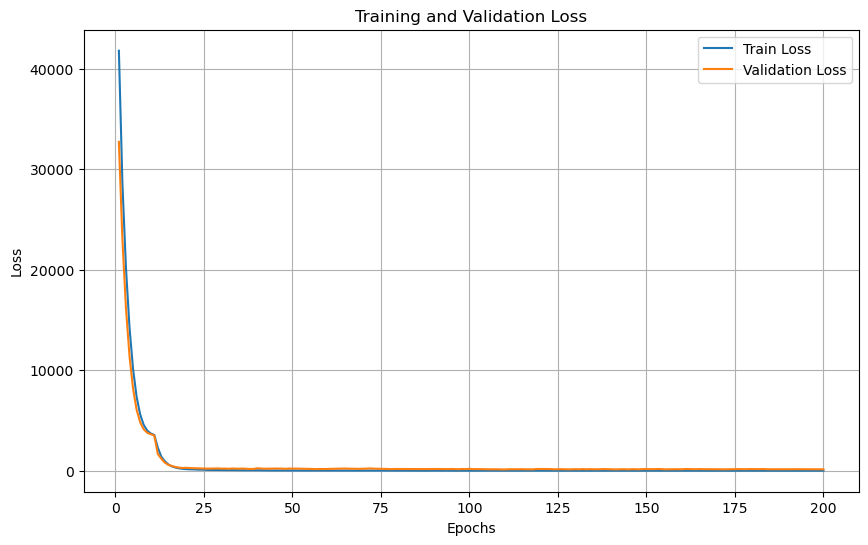

Train ended.


In [14]:
model = GRURegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


In [11]:
import utils 
test_loader = create_loaders_cls(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/splitted_100ms/T5",
        "/home/crois-times/timeseries/projects/tool_wear_havard/splitted_100ms/T8",
    ],
    modalities=['Acc','Force'],
    batch_size=32,
    aux_df_or_series=test_classified_output,
    train_val_ratio=None,
)




xb, yb = next(iter(test_loader))
seq_len  = xb.shape[1]   # 84(12*7)
input_sz = xb.shape[-1]  # 보통 84 (Acc3+Force3+Acoustic1)
print(seq_len, input_sz)

73 73


Evaluation Metrics:
RMSE: 19.4877
MAE : 17.0782
R²  : 0.8803
MAPE: 9.61%
Explained Var: 0.9127


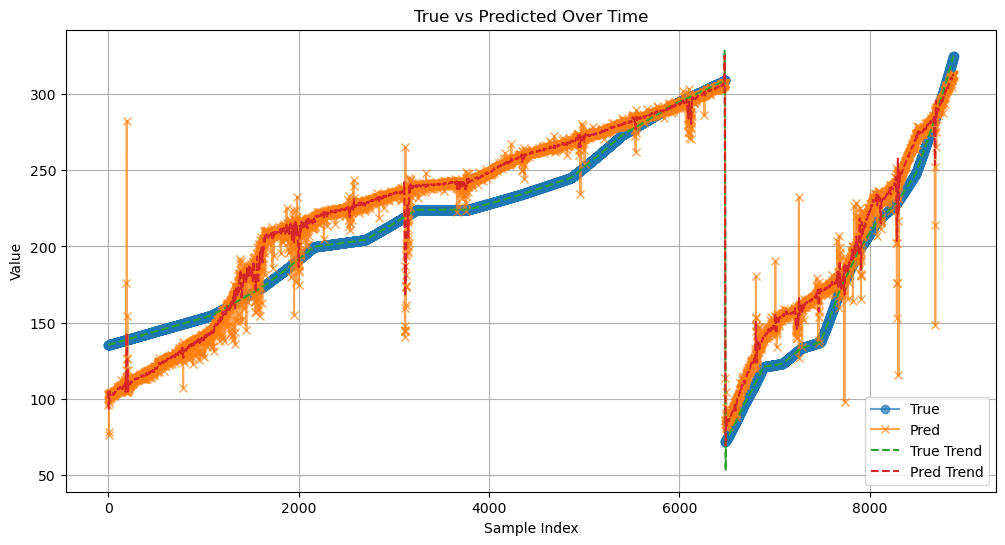

Test Metrics:
RMSE: 19.4877
MAE: 17.0782
R² Score: 0.8803
MAPE: 9.61%
Explained Variance Score: 0.9127


In [15]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [16]:
save_path = "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/model_weights/3-2_grumodel.pth"
torch.save(model.state_dict(), save_path)
print(f"Model weights saved to {save_path}")

Model weights saved to /home/crois-times/timeseries/JJ/Multimodal_Havard_2509/model_weights/3-2_grumodel.pth


Epoch 1/200 | Train Loss: 41067.3343 | Val Loss: 32735.7448
Epoch 2/200 | Train Loss: 28202.2474 | Val Loss: 23173.3985
Epoch 3/200 | Train Loss: 19990.0000 | Val Loss: 16399.9809
Epoch 4/200 | Train Loss: 14135.2180 | Val Loss: 11627.6031
Epoch 5/200 | Train Loss: 10047.2126 | Val Loss: 8377.7526
Epoch 6/200 | Train Loss: 7311.7910 | Val Loss: 6277.7751
Epoch 7/200 | Train Loss: 5564.8183 | Val Loss: 5007.9181
Epoch 8/200 | Train Loss: 4520.5181 | Val Loss: 4253.7757
Epoch 9/200 | Train Loss: 3810.2072 | Val Loss: 3654.4861
Epoch 10/200 | Train Loss: 2736.7653 | Val Loss: 2336.5704
Epoch 11/200 | Train Loss: 1971.6076 | Val Loss: 1882.7392
Epoch 12/200 | Train Loss: 1506.8954 | Val Loss: 1456.8751
Epoch 13/200 | Train Loss: 1193.8979 | Val Loss: 1223.2002
Epoch 14/200 | Train Loss: 904.9025 | Val Loss: 953.7036
Epoch 15/200 | Train Loss: 667.6177 | Val Loss: 739.8970
Epoch 16/200 | Train Loss: 517.0461 | Val Loss: 578.2834
Epoch 17/200 | Train Loss: 392.4376 | Val Loss: 498.7168
Epoch

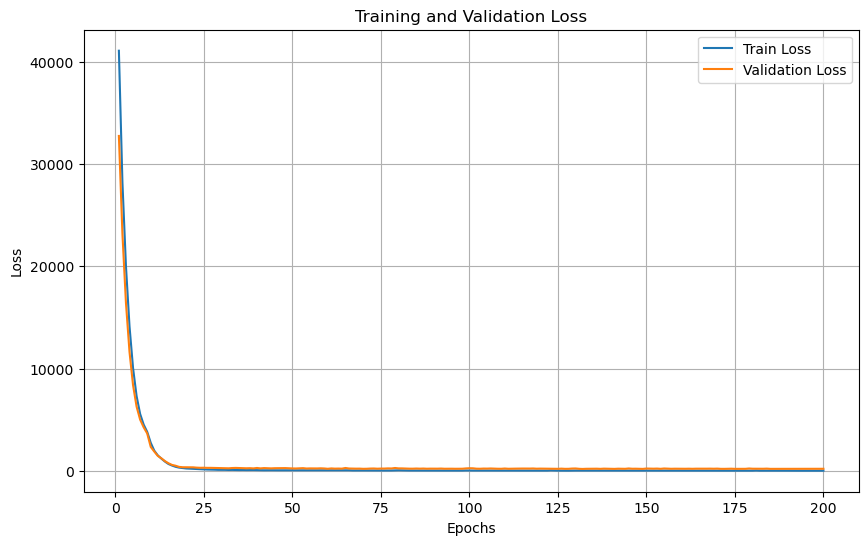

Train ended.


In [21]:
model = GRURegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


In [49]:
train_regression_pred = pd.read_csv("/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T1T4_predictions.csv")
test_regression_pred = pd.read_csv("/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T5T8_predictions.csv")


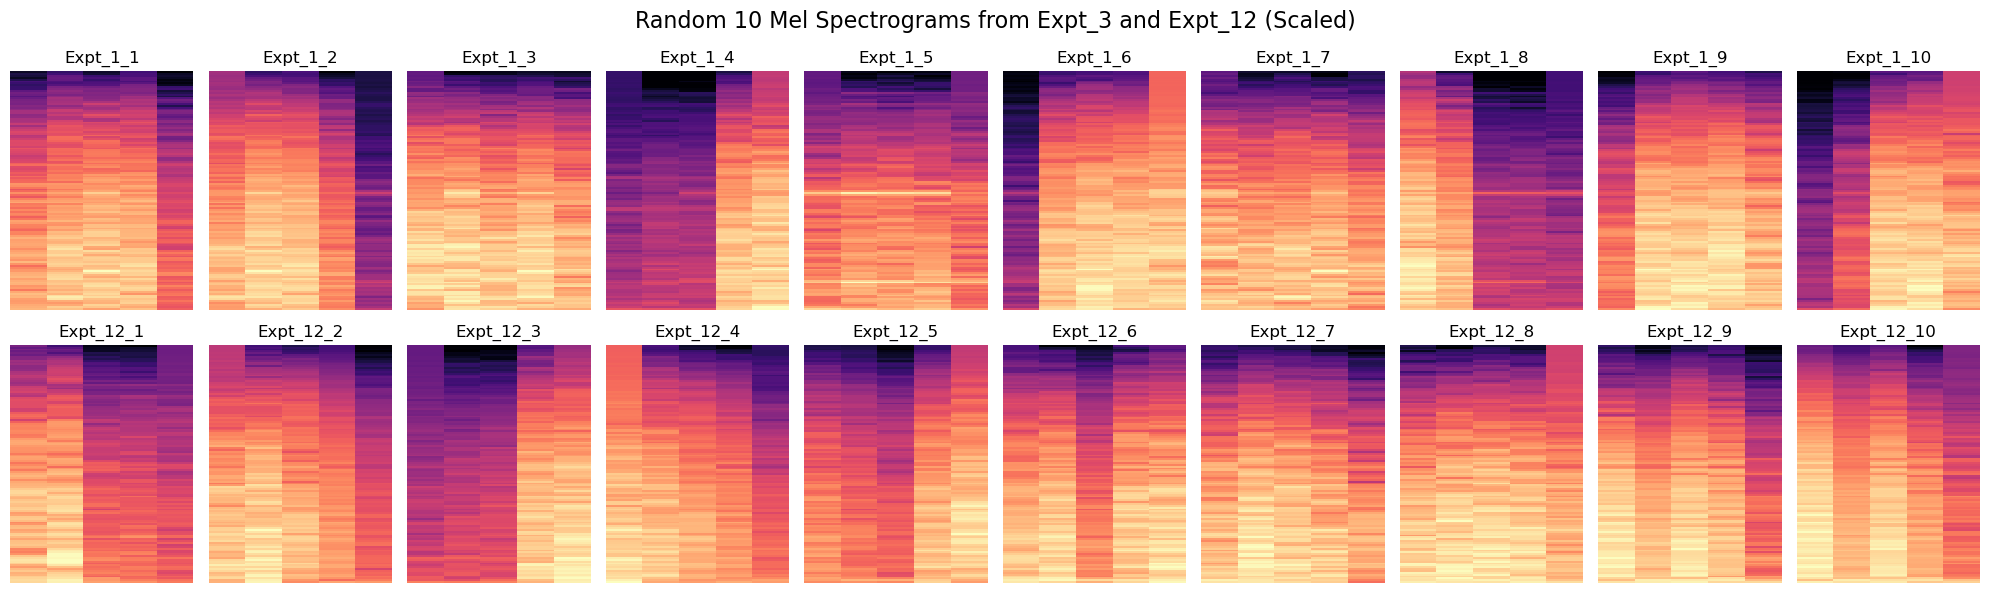

In [36]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, 
                                              n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 및 시각화 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([1, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # === ✅ 방법 4 적용: 신호 크기 Scaling ===
        signal_scaled = signal_interpolated * np.mean(signal_interpolated)  # 크기에 비례한 Scaling
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_scaled, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12 (Scaled)", fontsize=16)
plt.tight_layout()
plt.show()


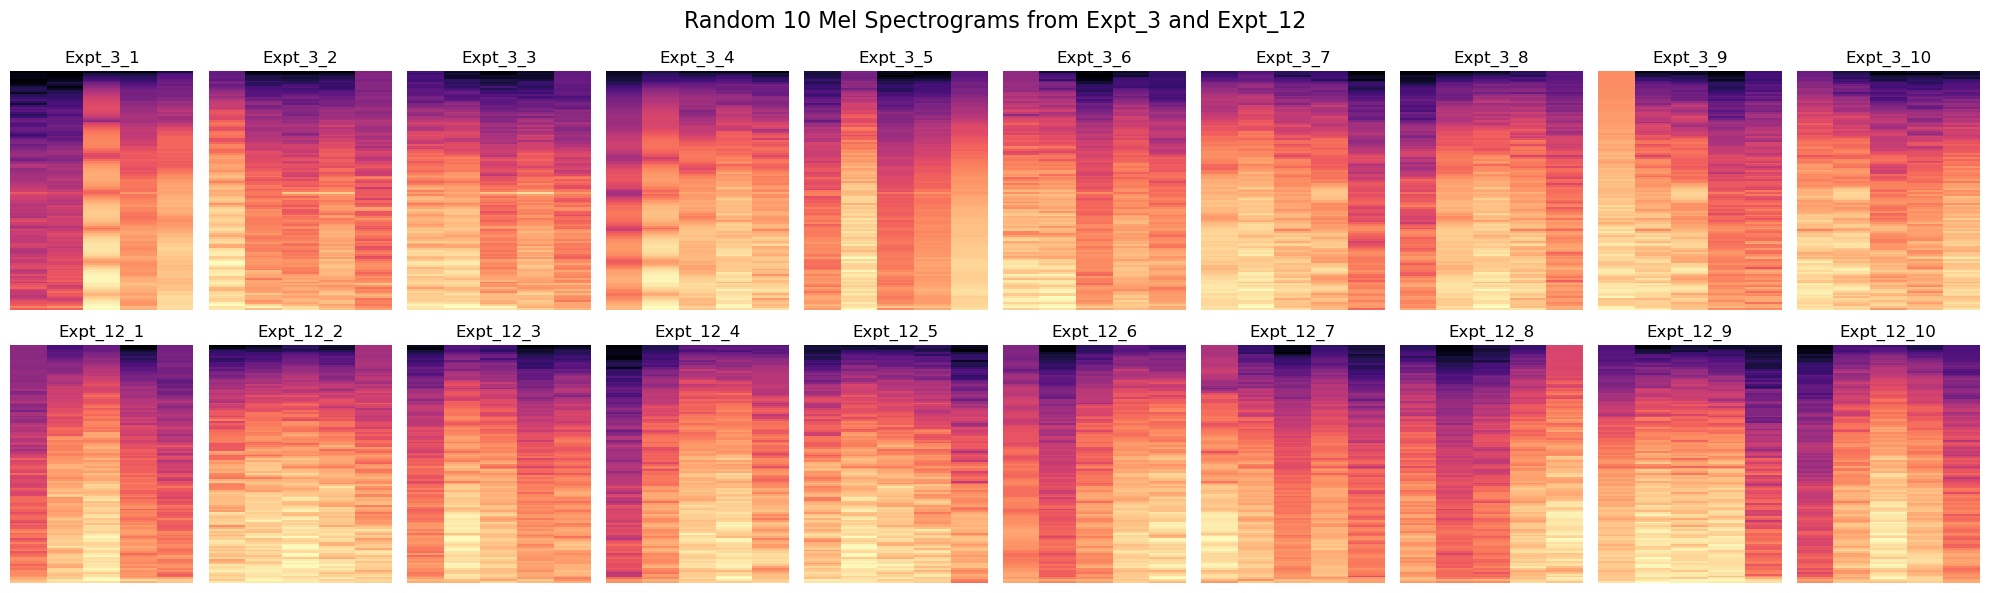

In [22]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([3, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12", fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

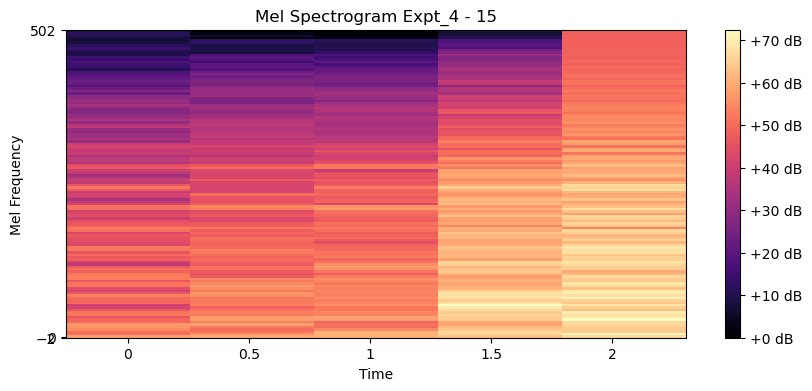

In [20]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
output_dir = "JJ/Harvard_Multimodal/Mel_spectrogram/T1"
num_splits = 540  # 생성할 Mel Spectrogram 개수
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트 (1000Hz, 동일한 조건 유지)
n_fft = 1000  # FFT 크기 (조건 유지)
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조 (고주파 영향 줄이기)

# 출력 폴더 생성
os.makedirs(output_dir, exist_ok=True)

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_1~Expt_12 반복 ===
image_index = 1  # 전체 이미지 번호
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Stride 계산 (겹치도록 자동 조정)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540개 Mel Spectrogram 생성
    for split_idx in range(num_splits):
        # 슬라이싱
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화 및 저장
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # 파일 저장
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # 이미지 인덱스 증가
        image_index += 1

print(f"Mel Spectrogram 생성 완료. 총 {image_index-1}개 이미지 저장됨.")
